<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Adjustment_for_chance_in_clustering_performance_evaluation_Rayi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra
1103213070
Task Lecture 6 Clustering

**Adjustment for chance in clustering performance evaluation**

**Defining the list of metrics to evaluate**

In [1]:
from sklearn import metrics

score_funcs = [
    ("V-measure", metrics.v_measure_score),
    ("Rand index", metrics.adjusted_rand_score),
    ("ARI", metrics.adjusted_rand_score),
    ("MI", metrics.mutual_info_score),
    ("NMI", metrics.normalized_mutual_info_score),
    ("AMI", metrics.adjusted_mutual_info_score),
]

# Assuming 'labels_true' and 'labels_pred' are the true and predicted labels respectively
labels_true = [0, 0, 1, 1, 2, 2]
labels_pred = [0, 0, 1, 1, 2, 2]

for name, score_func in score_funcs:
    score = score_func(labels_true, labels_pred)
    print(f"{name}: {score:.3f}")


V-measure: 1.000
Rand index: 1.000
ARI: 1.000
MI: 1.099
NMI: 1.000
AMI: 1.000


**First experiment: fixed ground truth labels and growing number of clusters**

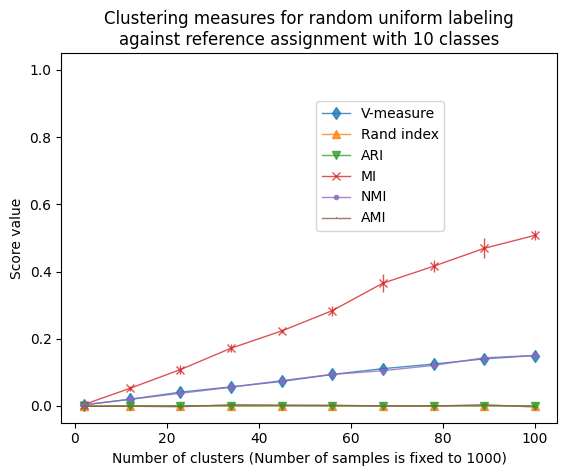

In [2]:
import numpy as np

rng = np.random.RandomState(0)


def random_labels(n_samples, n_classes):
    return rng.randint(low=0, high=n_classes, size=n_samples)


def fixed_classes_uniform_labelings_scores(
    score_func, n_samples, n_clusters_range, n_classes, n_runs=5
):
    scores = np.zeros((len(n_clusters_range), n_runs))
    labels_a = random_labels(n_samples=n_samples, n_classes=n_classes)

    for i, n_clusters in enumerate(n_clusters_range):
        for j in range(n_runs):
            labels_b = random_labels(n_samples=n_samples, n_classes=n_clusters)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores


import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of cluster numbers
n_samples = 1000
n_classes = 10
n_clusters_range = np.linspace(2, 100, 10).astype(int)

# Initialize lists for plots and names
plots = []
names = []

# Set color palette
sns.color_palette("colorblind")

# Create figure
plt.figure(1)

# Iterate over each score function and plot
for marker, (score_name, score_func) in zip("d^vx.,", score_funcs):
    # Calculate scores
    scores = fixed_classes_uniform_labelings_scores(
        score_func, n_samples, n_clusters_range, n_classes=n_classes
    )
    # Plot scores with error bars
    plots.append(
        plt.errorbar(
            n_clusters_range,
            scores.mean(axis=1),
            scores.std(axis=1),
            alpha=0.8,
            linewidth=1,
            marker=marker,
        )[0]
    )
    # Append score name to names list
    names.append(score_name)

# Add title and labels
plt.title(
    "Clustering measures for random uniform labeling\n"
    f"against reference assignment with {n_classes} classes"
)
plt.xlabel(f"Number of clusters (Number of samples is fixed to {n_samples})")
plt.ylabel("Score value")
plt.ylim(bottom=-0.05, top=1.05)
plt.legend(plots, names, bbox_to_anchor=(0.5, 0.5))
plt.show()


**Second experiment: varying number of classes and clusters**

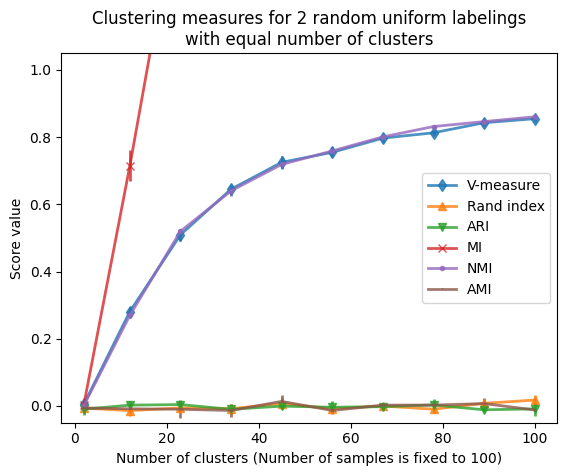

In [3]:
def uniform_labelings_scores(score_func, n_samples, n_clusters_range, n_runs=5):
    scores = np.zeros((len(n_clusters_range), n_runs))

    for i, n_clusters in enumerate(n_clusters_range):
        for j in range(n_runs):
            labels_a = random_labels(n_samples=n_samples, n_classes=n_clusters)
            labels_b = random_labels(n_samples=n_samples, n_classes=n_clusters)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

# Define the range of cluster numbers
n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(int)

# Create figure
plt.figure(2)

# Initialize lists for plots and names
plots = []
names = []

# Iterate over each score function and plot
for marker, (score_name, score_func) in zip("d^vx.,", score_funcs):
    # Calculate scores
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    # Plot scores with error bars
    plots.append(
        plt.errorbar(
            n_clusters_range,
            np.median(scores, axis=1),
            scores.std(axis=1),
            alpha=0.8,
            linewidth=2,
            marker=marker,
        )[0]
    )
    # Append score name to names list
    names.append(score_name)

# Add title and labels
plt.title(
    "Clustering measures for 2 random uniform labelings\nwith equal number of clusters"
)
plt.xlabel(f"Number of clusters (Number of samples is fixed to {n_samples})")
plt.ylabel("Score value")
plt.legend(plots, names)
plt.ylim(bottom=-0.05, top=1.05)
plt.show()
